# Decision Tree

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('data.csv', index_col=0)
print(df.shape)
df.head(2)

(863, 14)


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_rem, y_train, y_rem = train_test_split(df.drop('result',axis=1) , df['result'], test_size=0.2)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem , y_rem , test_size=0.5)

In [4]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[Text(0.4540441176470588, 0.9583333333333334, 'X[3] <= 59.5\nentropy = 0.551\nsamples = 690\nvalue = [602, 88]'),
 Text(0.14705882352941177, 0.875, 'X[1] <= 3.5\nentropy = 0.123\nsamples = 538\nvalue = [529, 9]'),
 Text(0.08823529411764706, 0.7916666666666666, 'X[5] <= 0.5\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.058823529411764705, 0.7083333333333334, 'X[1] <= 2.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.029411764705882353, 0.625, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08823529411764706, 0.625, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.11764705882352941, 0.7083333333333334, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.20588235294117646, 0.7916666666666666, 'X[3] <= 56.5\nentropy = 0.036\nsamples = 529\nvalue = [527, 2]'),
 Text(0.17647058823529413, 0.7083333333333334, 'entropy = 0.0\nsamples = 499\nvalue = [499, 0]'),
 Text(0.23529411764705882, 0.7083333333333334, 'X[2] <= 0.5\nentropy = 0.353\nsamples = 30\nvalue = 

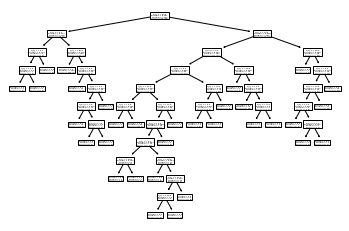

In [5]:
# Show the Tree
from sklearn import tree
tree.plot_tree(classifier)

In [6]:
y_pred = classifier.predict(x_valid)
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
cm = confusion_matrix(y_valid, y_pred)
print(cm)
accuracy_score(y_valid, y_pred)

[[77  0]
 [ 2  7]]


0.9767441860465116

# Predict on new data (test data)

In [7]:
pred=classifier.predict(x_test)

In [8]:
accuracy_score(y_test, pred)

0.9655172413793104

In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[74  2]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.83      0.91      0.87        11

    accuracy                           0.97        87
   macro avg       0.91      0.94      0.92        87
weighted avg       0.97      0.97      0.97        87



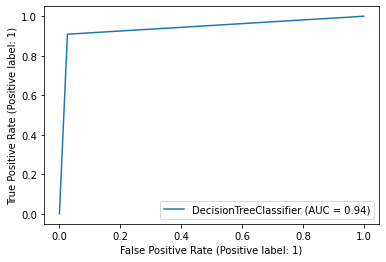

In [10]:
from sklearn import metrics
metrics.plot_roc_curve(classifier, x_test, y_test)
plt.show()

# Thank You